In [ ]:
!pip install stockstats
!pip install mplfinance

     |████████████████████████████████| 61kB 1.8MB/s 


In [ ]:
import urllib
import time
import pytz
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import stockstats
import mplfinance as mpf


from datetime import datetime
from pandas_datareader import data
from stockstats import StockDataFrame
from mplfinance.original_flavor import candlestick_ohlc
# from mpl_finance import candlestick_ohlc

In [ ]:
now = datetime.now()
current_time = now.strftime('%Y-%m-%d %H:%M:%S')
print("Current Time:", current_time)

tz_Sydney = pytz.timezone('Australia/Sydney')
datetime_Sydney = datetime.now(tz_Sydney)
print("Sydney time:", datetime_Sydney.strftime("%Y-%m-%d %H:%M:%S"))


Current Time: 2020-10-22 03:41:08
Sydney time: 2020-10-22 14:41:08


In [ ]:
stocks = ['SPY']
start_date = '2016-11-01'
end_date = '2020-09-30'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
rawDf = data.DataReader(stocks, 'yahoo', start_date, end_date)
rawDf.head(9)

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,
2016-11-01,195.380661,211.009995,212.990005,209.600006,212.929993,122781800.0
2016-11-02,194.204712,209.740005,211.100006,209.229996,210.649994,103330800.0
2016-11-03,193.315811,208.779999,210.240005,208.460007,209.990005,88939300.0
2016-11-04,193.102814,208.550003,209.889999,208.380005,208.910004,109122100.0
2016-11-07,197.362137,213.149994,213.190002,208.550003,208.550003,109794900.0
2016-11-08,198.251022,214.110001,214.770004,212.380005,212.690002,106772100.0
2016-11-09,200.352905,216.380005,217.100006,212.339996,212.369995,258429000.0
2016-11-10,200.852905,216.919998,218.309998,215.220001,217.300003,172113300.0


In [ ]:
rawDf.columns = rawDf.columns.droplevel('Symbols')
rawDf.reset_index(inplace = True)
rawDf.head(10)

Attributes,Date,Adj Close,Close,High,Low,Open,Volume
0,2016-11-01,195.380661,211.009995,212.990005,209.600006,212.929993,122781800.0
1,2016-11-02,194.204712,209.740005,211.100006,209.229996,210.649994,103330800.0
2,2016-11-03,193.315811,208.779999,210.240005,208.460007,209.990005,88939300.0
3,2016-11-04,193.102814,208.550003,209.889999,208.380005,208.910004,109122100.0
4,2016-11-07,197.362137,213.149994,213.190002,208.550003,208.550003,109794900.0
5,2016-11-08,198.251022,214.110001,214.770004,212.380005,212.690002,106772100.0
6,2016-11-09,200.352905,216.380005,217.100006,212.339996,212.369995,258429000.0
7,2016-11-10,200.852905,216.919998,218.309998,215.220001,217.300003,172113300.0
8,2016-11-11,200.389908,216.419998,216.699997,215.320007,216.080002,100552700.0
9,2016-11-14,200.547348,216.589996,217.270004,215.720001,217.029999,94580000.0


In [ ]:
rawDf.columns.name = None
rawDf.head(10)

,Date,Adj Close,Close,High,Low,Open,Volume
0,2016-11-01,195.380661,211.009995,212.990005,209.600006,212.929993,122781800.0
1,2016-11-02,194.204712,209.740005,211.100006,209.229996,210.649994,103330800.0
2,2016-11-03,193.315811,208.779999,210.240005,208.460007,209.990005,88939300.0
3,2016-11-04,193.102814,208.550003,209.889999,208.380005,208.910004,109122100.0
4,2016-11-07,197.362137,213.149994,213.190002,208.550003,208.550003,109794900.0
5,2016-11-08,198.251022,214.110001,214.770004,212.380005,212.690002,106772100.0
6,2016-11-09,200.352905,216.380005,217.100006,212.339996,212.369995,258429000.0
7,2016-11-10,200.852905,216.919998,218.309998,215.220001,217.300003,172113300.0
8,2016-11-11,200.389908,216.419998,216.699997,215.320007,216.080002,100552700.0
9,2016-11-14,200.547348,216.589996,217.270004,215.720001,217.029999,94580000.0


In [ ]:
spDf = rawDf.copy()
spDf.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [ ]:
# for i in range(0,spDf.shape[0]-2):
#     spDf.loc[spDf.index[i+2],'SMA_3'] = np.round(((spDf.iloc[i,2]+ spDf.iloc[i+1,2] +spDf.iloc[i+2,2])/3),1)
# for i in range(0,spDf.shape[0]-9):
#     spDf.loc[spDf.index[i+9],'SMA_10'] = np.round(((spDf.iloc[i,2]+ spDf.iloc[i+1,2] +spDf.iloc[i+2,2])/10),1)
# for i in range(0,spDf.shape[0]-59):
#     spDf.loc[spDf.index[i+59],'SMA_60'] = np.round(((spDf.iloc[i,2]+ spDf.iloc[i+1,2] +spDf.iloc[i+2,2])/60),1)
spDf['SMA3'] = spDf.rolling(3, win_type='triang').mean().Close
spDf['SMA5'] = spDf.rolling(5, win_type='triang').mean().Close
spDf['SMA10'] = spDf.rolling(10, win_type='triang').mean().Close
spDf['SMA30'] = spDf.rolling(30, win_type='triang').mean().Close
spDf['SMA60'] = spDf.rolling(60, win_type='triang').mean().Close

spDf.head(10)

,Date,Adj Close,Close,High,Low,Open,Volume,SMA3,SMA5,SMA10,SMA30,SMA60
0,2016-11-01,195.380661,211.009995,212.990005,209.600006,212.929993,122781800.0,NaN,NaN,NaN,NaN,NaN
1,2016-11-02,194.204712,209.740005,211.100006,209.229996,210.649994,103330800.0,NaN,NaN,NaN,NaN,NaN
2,2016-11-03,193.315811,208.779999,210.240005,208.460007,209.990005,88939300.0,209.817501,NaN,NaN,NaN,NaN
3,2016-11-04,193.102814,208.550003,209.889999,208.380005,208.910004,109122100.0,208.962502,NaN,NaN,NaN,NaN
4,2016-11-07,197.362137,213.149994,213.190002,208.550003,208.550003,109794900.0,209.757500,209.675556,NaN,NaN,NaN
5,2016-11-08,198.251022,214.110001,214.770004,212.380005,212.690002,106772100.0,212.239998,210.373333,NaN,NaN,NaN
6,2016-11-09,200.352905,216.380005,217.100006,212.339996,212.369995,258429000.0,214.437500,212.214444,NaN,NaN,NaN
7,2016-11-10,200.852905,216.919998,218.309998,215.220001,217.300003,172113300.0,215.947502,214.095556,NaN,NaN,NaN
8,2016-11-11,200.389908,216.419998,216.699997,215.320007,216.080002,100552700.0,216.660000,215.641112,NaN,NaN,NaN
9,2016-11-14,200.547348,216.589996,217.270004,215.720001,217.029999,94580000.0,216.587498,216.340000,213.0886,NaN,NaN


In [ ]:
stocks = StockDataFrame.retype(spDf[["Open", "Close", "High", "Low", "Volume"]])
stocks['rsi_12']

0            NaN
1       0.000000
2       0.000000
3       0.000000
4      69.742190
         ...    
980    35.841259
981    43.331054
982    49.981120
983    47.935577
984    50.966763
Name: rsi_12, Length: 985, dtype: float64

In [ ]:
stockData = spDf.copy()
stockData['Action'] = 0
stockData['Quantity'] = 0
stockData['Remaining'] = 1000000
stockData['Portfolio'] = stockData['Remaining'] + stockData['Quantity']*stockData['Close']
stockData['Index'] = 1000000
stockData['DailyReturnIndex'] = 0
stockData['DailyReturnPort1'] = 0
#indicators
stockData['RSI12'] = stocks['rsi_12']
# MACD
stockData['MACD'] = stocks['macd']
# MACD signal line
stockData['MACDS'] = stocks['macds']
# MACD histogram
stockData['MACDH'] = stocks['macdh']

stockData.head(10)

,Date,Adj Close,Close,High,Low,Open,Volume,SMA3,SMA5,SMA10,SMA30,SMA60,Action,Quantity,Remaining,Portfolio,Index,DailyReturnIndex,DailyReturnPort1,RSI12,MACD,MACDS,MACDH
0,2016-11-01,195.380661,211.009995,212.990005,209.600006,212.929993,122781800.0,NaN,NaN,NaN,NaN,NaN,0,0,1000000,1000000.0,1000000,0,0,NaN,0.000000,0.000000,0.000000
1,2016-11-02,194.204712,209.740005,211.100006,209.229996,210.649994,103330800.0,NaN,NaN,NaN,NaN,NaN,0,0,1000000,1000000.0,1000000,0,0,0.000000,-0.028493,-0.015830,-0.012664
2,2016-11-03,193.315811,208.779999,210.240005,208.460007,209.990005,88939300.0,209.817501,NaN,NaN,NaN,NaN,0,0,1000000,1000000.0,1000000,0,0,0.000000,-0.066076,-0.036422,-0.029654
3,2016-11-04,193.102814,208.550003,209.889999,208.380005,208.910004,109122100.0,208.962502,NaN,NaN,NaN,NaN,0,0,1000000,1000000.0,1000000,0,0,0.000000,-0.089854,-0.054522,-0.035331
4,2016-11-07,197.362137,213.149994,213.190002,208.550003,208.550003,109794900.0,209.757500,209.675556,NaN,NaN,NaN,0,0,1000000,1000000.0,1000000,0,0,69.742190,0.082162,-0.013862,0.096024
5,2016-11-08,198.251022,214.110001,214.770004,212.380005,212.690002,106772100.0,212.239998,210.373333,NaN,NaN,NaN,0,0,1000000,1000000.0,1000000,0,0,73.888265,0.225072,0.050902,0.174170
6,2016-11-09,200.352905,216.380005,217.100006,212.339996,212.369995,258429000.0,214.437500,212.214444,NaN,NaN,NaN,0,0,1000000,1000000.0,1000000,0,0,80.707425,0.415680,0.143218,0.272462
7,2016-11-10,200.852905,216.919998,218.309998,215.220001,217.300003,172113300.0,215.947502,214.095556,NaN,NaN,NaN,0,0,1000000,1000000.0,1000000,0,0,81.931921,0.562487,0.243976,0.318511
8,2016-11-11,200.389908,216.419998,216.699997,215.320007,216.080002,100552700.0,216.660000,215.641112,NaN,NaN,NaN,0,0,1000000,1000000.0,1000000,0,0,76.995601,0.630783,0.333331,0.297453
9,2016-11-14,200.547348,216.589996,217.270004,215.720001,217.029999,94580000.0,216.587498,216.340000,213.0886,NaN,NaN,0,0,1000000,1000000.0,1000000,0,0,77.498436,0.678810,0.410738,0.268072


In [ ]:
import scipy

In [ ]:
lrdata = stockData.copy()
lrdata['percentChange'] = (lrdata['Close']-lrdata['Open'])/lrdata['Open']


min = 1


for i in list(lrdata.columns):
    minj = 1
    mini = 0.05
    for j in range(10, 3000):
        
        try:
            var = i
            k = scipy.stats.linregress(x = np.array(lrdata.tail(j)[var]), y = np.array(lrdata.tail(j)['percentChange']))[3]
            if (k < mini) & (k!=0) & (i!= 'percentChange'):
                minj = j
                mini = k
        except Exception as e:  
            #print('error: ' + str(e))
            pass
    if (mini < 0.05):
        print("Significant variable: " + str(i) + ", max at day: " + str(minj) + ", p-value = " + str(mini))
print('done')



Significant variable: High, max at day: 19, p-value = 0.01561464596833684
Significant variable: Low, max at day: 445, p-value = 0.03084375167787072
Significant variable: Open, max at day: 445, p-value = 0.0010183364816024856
Significant variable: Volume, max at day: 75, p-value = 1.5428081697741548e-06
Significant variable: SMA3, max at day: 445, p-value = 0.005407418047940749
Significant variable: SMA5, max at day: 445, p-value = 0.0034148405744430436
Significant variable: SMA10, max at day: 445, p-value = 0.003976495609708815
Significant variable: SMA60, max at day: 19, p-value = 0.03500131428046184


/usr/local/lib/python3.6/dist-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning:

divide by zero encountered in double_scalars



Significant variable: RSI12, max at day: 981, p-value = 6.000195224627528e-15
Significant variable: MACD, max at day: 133, p-value = 0.0007665506611927179
Significant variable: MACDS, max at day: 133, p-value = 0.0014622513000596678
Significant variable: MACDH, max at day: 984, p-value = 0.0023264300019965943
done


LinregressResult(slope=0.00015976669304522742, intercept=-0.00913231648812424, rvalue=0.2456465045694326, pvalue=6.000195224627528e-15, stderr=2.014972724502039e-05)


Text(0.5, 1.0, 'X = RSI12, Y = Daily Percent Change, p-value = 6.000195224627528e-15')

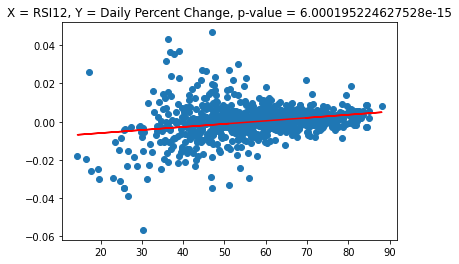

In [ ]:
var = 'RSI12'
days = 981
plt.scatter(y = 'percentChange', x=var, data=lrdata.tail(days))

print(scipy.stats.linregress(x = np.array(lrdata.tail(days)[var]), y = np.array(lrdata.tail(days)['percentChange'])))
m,b,r,p,s = scipy.stats.linregress(x = np.array(lrdata.tail(days)[var]), y = np.array(lrdata.tail(days)['percentChange']))
x = lrdata.tail(days)[var]
plt.plot(x, m*x + b, color = 'r')
plt.title("X = " + var + ", Y = Daily Percent Change, p-value = "+str(p))

LinregressResult(slope=-5.518193282908088e-05, intercept=0.01706198247107662, rvalue=-0.13166128750011172, pvalue=0.005407418047940749, stderr=1.973966412771268e-05)


Text(0.5, 1.0, 'X = SMA3, Y = Daily Percent Change, p-value = 0.005407418047940749')

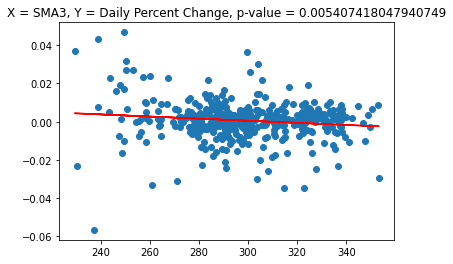

In [ ]:
var = 'SMA3'
days = 445
plt.scatter(y = 'percentChange', x=var, data=lrdata.tail(days))

print(scipy.stats.linregress(x = np.array(lrdata.tail(days)[var]), y = np.array(lrdata.tail(days)['percentChange'])))
m,b,r,p,s = scipy.stats.linregress(x = np.array(lrdata.tail(days)[var]), y = np.array(lrdata.tail(days)['percentChange']))
x = lrdata.tail(days)[var]
plt.plot(x, m*x + b, color = 'r')
plt.title("X = " + var + ", Y = Daily Percent Change, p-value = "+str(p))

LinregressResult(slope=-5.805260100738433e-05, intercept=0.017906870481809067, rvalue=-0.13850614799480798, pvalue=0.0034148405744430436, stderr=1.9721709154026056e-05)


Text(0.5, 1.0, 'X = SMA5, Y = Daily Percent Change, p-value = 0.0034148405744430436')

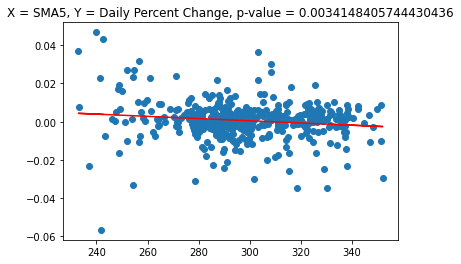

In [ ]:
var = 'SMA5'
days = 445
plt.scatter(y = 'percentChange', x=var, data=lrdata.tail(days))

print(scipy.stats.linregress(x = np.array(lrdata.tail(days)[var]), y = np.array(lrdata.tail(days)['percentChange'])))
m,b,r,p,s = scipy.stats.linregress(x = np.array(lrdata.tail(days)[var]), y = np.array(lrdata.tail(days)['percentChange']))
x = lrdata.tail(days)[var]
plt.plot(x, m*x + b, color = 'r')
plt.title("X = " + var + ", Y = Daily Percent Change, p-value = "+str(p))

LinregressResult(slope=0.0015993843895547226, intercept=-0.5330626022550936, rvalue=0.48572564086463466, pvalue=0.03500131428046184, stderr=0.0006980782506432776)


Text(0.5, 1.0, 'X = SMA60, Y = Daily Percent Change, p-value = 0.03500131428046184')

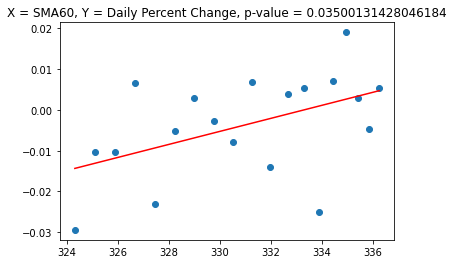

In [ ]:
var = 'SMA60'
days = 980
plt.scatter(y = 'percentChange', x=var, data=lrdata.tail(days))

print(scipy.stats.linregress(x = np.array(lrdata.tail(days)[var]), y = np.array(lrdata.tail(days)['percentChange'])))
m,b,r,p,s = scipy.stats.linregress(x = np.array(lrdata.tail(days)[var]), y = np.array(lrdata.tail(days)['percentChange']))
x = lrdata.tail(days)[var]
plt.plot(x, m*x + b, color = 'r')
plt.title("X = " + var + ", Y = Daily Percent Change, p-value = "+str(p))

LinregressResult(slope=0.0007148220166615625, intercept=0.00014332914604931702, rvalue=0.09696701165397018, pvalue=0.0023264300019965943, stderr=0.00023413522468415624)


Text(0.5, 1.0, 'X = MACDH, Y = Daily Percent Change, p-value = 0.0023264300019965943')

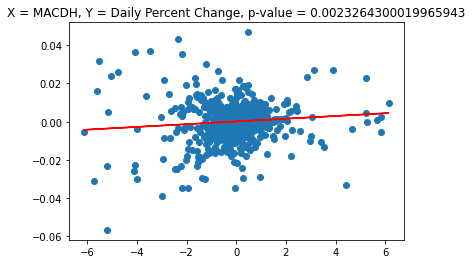

In [ ]:
var = 'MACDH'
days = 984
plt.scatter(y = 'percentChange', x=var, data=lrdata.tail(days))

print(scipy.stats.linregress(x = np.array(lrdata.tail(days)[var]), y = np.array(lrdata.tail(days)['percentChange'])))
m,b,r,p,s = scipy.stats.linregress(x = np.array(lrdata.tail(days)[var]), y = np.array(lrdata.tail(days)['percentChange']))
x = lrdata.tail(days)[var]
plt.plot(x, m*x + b, color = 'r')
plt.title("X = " + var + ", Y = Daily Percent Change, p-value = "+str(p))

LinregressResult(slope=0.00015976669304522742, intercept=-0.00913231648812424, rvalue=0.2456465045694326, pvalue=6.000195224627528e-15, stderr=2.014972724502039e-05)


Text(0.5, 1.0, 'X = RSI12, Y = Daily Percent Change, p = 6.000195224627528e-15')

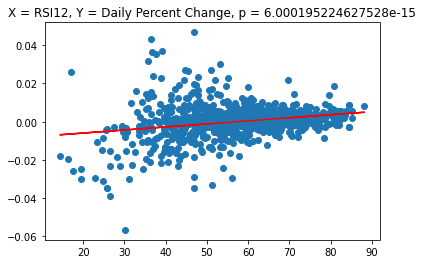

In [ ]:
var = 'RSI12'
days = 981
plt.scatter(y = 'percentChange', x=var, data=lrdata.tail(days))

print(scipy.stats.linregress(x = np.array(lrdata.tail(days)[var]), y = np.array(lrdata.tail(days)['percentChange'])))
m,b,r,p,s = scipy.stats.linregress(x = np.array(lrdata.tail(days)[var]), y = np.array(lrdata.tail(days)['percentChange']))
x = lrdata.tail(days)[var]
plt.plot(x, m*x + b, color = 'r')
plt.title("X = " + var + ", Y = Daily Percent Change, p = "+str(p))

LinregressResult(slope=-5.720691249678151e-05, intercept=0.017629834251038264, rvalue=-0.13627192701080368, pvalue=0.003976495609708815, stderr=1.9759224924663806e-05)


Text(0.5, 1.0, 'X = SMA10, Y = Daily Percent Change, p-value = 0.003976495609708815')

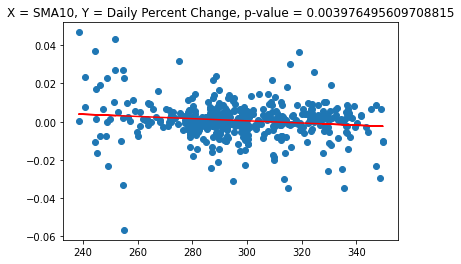

In [ ]:
var = 'SMA10'
days = 445
plt.scatter(y = 'percentChange', x=var, data=lrdata.tail(days))

print(scipy.stats.linregress(x = np.array(lrdata.tail(days)[var]), y = np.array(lrdata.tail(days)['percentChange'])))
m,b,r,p,s = scipy.stats.linregress(x = np.array(lrdata.tail(days)[var]), y = np.array(lrdata.tail(days)['percentChange']))
x = lrdata.tail(days)[var]
plt.plot(x, m*x + b, color = 'r')
plt.title("X = " + var + ", Y = Daily Percent Change, p-value = "+str(p))